<h1 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #CCCCFF; color: black;"><center><br>HuBMAP + HPA 👀: Exploratory Data Analysis 🔬</center></h1>
                                                      
<center><img src = "https://drive.google.com/uc?id=1pbIvjTlhGywfhiMTqcsdOB5LSHlklM90" width = "1000" height = "500"/></center>   

<h5 style="text-align: center; font-family: Verdana; font-size: 12px; font-style: normal; font-weight: bold; text-decoration: None; text-transform: none; letter-spacing: 1px; color: black; background-color: #ffffff;">CREATED BY: NGHI HUYNH and YUAN HONG</h5>

<p id="toc"></p>
<h2 class="list-group-item list-group-item-action active" data-toggle="list" style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #CCCCFF; color: black;" role="tab" aria-controls="home"><center><br>CONTENTS</center></h2>

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 16px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><a href="#background">0&nbsp;&nbsp;&nbsp;&nbsp;BACKGROUND INFORMATION</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 16px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><a href="#imports">1&nbsp;&nbsp;&nbsp;&nbsp;IMPORTS</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 16px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><a href="#img_viz">2&nbsp;&nbsp;&nbsp;&nbsp;IMAGE + MASK VISUALIZATION</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 16px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><a href="#metadata">3&nbsp;&nbsp;&nbsp;&nbsp;METADATA ANALYSIS</a></h3>

---


<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#F08080; border:0; color:black' role="tab" aria-controls="home"><center><br>If you find this notebook useful, do give us an upvote, it motivates us a lot.<br><br> This notebook is still a work in progress. Keep checking for further developments!😊</center></h3>


<a id="background"></a>

<h2 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #CCCCFF; color: black;" id="background"><center><br>0. BACKGROUND INFORMATION <a href="#toc">&#10514;</a></center> </h2>

# Task description:

In this competition, we'll **identify and segment functional tissue units (FTUs)** accross **five** human organs:

* Prostate
* Spleen
* Lung
* Kidney
* Large Intestine

The challenge in this competition is to build algorithms that **generalize**:
* across different **organs** and
* across different **dataset** differences

=> This is a **semantic segmentation** problem.

# Data description:

They only release public *Human Protein Atlas (HPA)* data for the training dataset. However, they will release private *HPA* data and *Human BioMolecular Atlas Program (HuBMAP)* for their public test set. For the private test set, they only use *HuBMAP* data.

**File Information**:
1. `train|test.csv`:
* `id` - The image ID.
* `organ` - The organ that the biopsy sample was taken from.
* `data_source` - Whether the image was provided by Hubamp or HPA.
* `img_height` - The height of the image in pixels.
* `img_width` - The width of the image in pixels.
* `pixel_size` - The height/width of a single pixel from this image in micrometers. All HPA images have a pixel size of 0.4 µm. For Hubmap imagery the pixel size is 0.5 µm for kidney, 0.2290 µm for large intestine, 0.7562 µm for lung, 0.4945 µm for spleen, and 6.263 µm for prostate.
* `tissue_thickness` - The thickness of the biopsy sample in micrometers. All HPA images have a thickness of 4 µm. The Hubmap samples have tissue slice thicknesses 10 µm for kidney, 8 µm for large intestine, 4 µm for spleen, 5 µm for lung, and 5 µm for prostate.
* `rle` - The target column. A run length encoded copy of the annotations. Provided for the training set only.
* `age` - The patient's age in years. Provided for the training set only.
* `sex` - The sex of the patient. Provided for the training set only.
2. `train_annotations`: provided in the format of **points that define the boundaries of the polygon masks of the FTUs**
3. `train|test_images`: the images:
* Expect roughly 550 images in the hidden test set.
* All images used have at least one FTU.
* All tissue data used in this competition is from healthy donors that pathologists identified as pathologically unremarkable tissue.
* HPA details:
    * All HPA images are 3000 x 3000 pixels with a tissue area within the image around 2500 x 2500 pixels.
    * HPA samples were stained with antibodies visualized with 3,3'-diaminobenzidine (DAB) and counterstained with hematoxylin.
* HuBMAP details:
    * The Hubmap images range in size from 4500x4500 down to 160x160 pixels.
    * HuBMAP images were prepared using Periodic acid-Schiff (PAS)/hematoxylin and eosin (H&E) stains.
4. `sample_submission.csv`:
* `id`-the image ID
* `rle`-a run length encoded mask of the FTUs in the image

# Evaluation metric:

This competition is evaluated on the mean [Dice coefficient](https://radiopaedia.org/articles/dice-similarity-coefficient#:~:text=The%20Dice%20similarity%20coefficient%2C%20also,between%20two%20sets%20of%20data.). The Dice coefficient can be used to compare the pixel-wise agreement between a predicted segmentation and its corresponding ground truth. The formula is given by:

$$\frac{2∗|𝑋∩𝑌|}{|𝑋|+|𝑌|}$$

where 
* X is the predicted set of pixels and Y is the ground truth. 
* The Dice coefficient is defined to be 1 when both X and Y are empty. 

**Note**: metric is to judge the performance of the model, whereas loss function is to optimize the model.

In this case, our metric is the **mean Dice coefficient**, and we can use different loss functions like 
* **Dice Loss**
* **Jaccard Loss**
* **BCE Loss**
* **Lovasz Loss**
* **Tversky Loss**

to optimize our models

# Submission file format

To reduce the submission file size, the metric uses run-length encoding on the pixel values.

Instead of submitting an exhaustive list of indices for our segmentation, we will submit pairs of values that contain a start position and a run length

E.g. '1 3' implies starting at pixel 1 and running a total of 3 pixels (1,2,3).

Note that, at the time of encoding, the mask should be **binary**
* The masks for all objects in an image are joined into a single large mask
* The value of 0 should indicate pixels that are not masked
* The value of 1 will indicate pixels that are masked.

# Methods:

1. Overview:
    * **Run-length encoding (RLE)**: a form of lossless data compression.
    
    Since we already have the RLE masks, we don't need to use the annotations from `.json` file.
    * **Given**: images (`.tiff`), masks in RLE (we need to convert RLE to binary mask before feeding to our models)
    * **Predict**: masks then convert to RLE for submission
2. Data processing:
    * Resize
    * Normalize
3. Data augmentation:
4. Baseline model: 
    * UNET

5. Testing model:
    * UNET + pretrained model from previous competition

<a id="imports"></a>

<h2 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #CCCCFF; color: black;" id="imports"><center><br>1. IMPORTS <a href="#toc">&#10514;</a></center> </h2>

In [1]:
import os 
import glob
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

import plotly
from plotly import tools
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline as pyo
import plotly.io as pio
import plotly.graph_objects as go
#pio.templates.default = 'plotly_white'
sns.set_theme(style="dark")
import cv2
import tifffile as tiff

import warnings
warnings.simplefilter("ignore")

# Global config

In [2]:
class config:
    BASE_PATH = Path("../input/hubmap-organ-segmentation/")
    TRAIN_CSV_PATH = BASE_PATH / "train.csv"
    TRAIN_IMAGES_PATH = BASE_PATH / "train_images/"
    TRAIN_ANNOTATIONS_PATH = BASE_PATH / "train_annotations/" # Not needed

# Load datasets

## Train dataset

In [3]:
data = pd.read_csv(config.TRAIN_CSV_PATH)
data.head()

id     organ data_source  img_height  img_width  pixel_size  \
0  10044  prostate         HPA        3000       3000         0.4   
1  10274  prostate         HPA        3000       3000         0.4   
2  10392    spleen         HPA        3000       3000         0.4   
3  10488      lung         HPA        3000       3000         0.4   
4  10610    spleen         HPA        3000       3000         0.4   

   tissue_thickness                                                rle   age  \
0                 4  1459676 77 1462675 82 1465674 87 1468673 92 14...  37.0   
1                 4  715707 2 718705 8 721703 11 724701 18 727692 3...  76.0   
2                 4  1228631 20 1231629 24 1234624 40 1237623 47 12...  82.0   
3                 4  3446519 15 3449517 17 3452514 20 3455510 24 34...  78.0   
4                 4  478925 68 481909 87 484893 105 487863 154 4908...  21.0   

      sex  
0    Male  
1    Male  
2    Male  
3    Male  
4  Female

## Train images

Load a single image from `train_images`

In [4]:
id_ = 10274
img = tiff.imread(str(config.TRAIN_IMAGES_PATH/ f"{id_}.tiff"))
print(img.shape)

(3000, 3000, 3)


To enhance image contrast, we apply a method from the [LAB color space](https://www.xrite.com/blog/lab-color-space)

LAB color space expresses color variations across three channels. One channel for brightness and two channels for color:

* L-channel: representing lightness in the image
* a-channel: representing change in color between red and green
* b-channel: representing change in color between yellow and blue

We perform adaptive histogram equalization on the L-channel, and convert the image back to RGB color space.

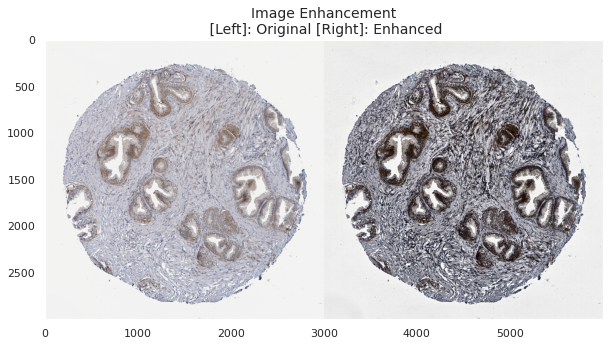

In [5]:
# https://stackoverflow.com/questions/39308030/how-do-i-increase-the-contrast-of-an-image-in-python-opencv
# Enhance image contrast
sample = img.copy()
lab= cv2.cvtColor(sample, cv2.COLOR_BGR2LAB)
l_channel, a, b = cv2.split(lab)
# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(12,12))
cl = clahe.apply(l_channel)

# merge the CLAHE enhanced L-channel with the a and b channel
limg = cv2.merge((cl,a,b))

# Converting image from LAB Color model to BGR color space
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

plt.figure(figsize=(10, 10))
# Stacking the original image with the enhanced image
result = np.hstack((img, enhanced_img))
plt.title('Image Enhancement\n [Left]: Original [Right]: Enhanced', fontsize=14)
plt.imshow(result)

## Plot image

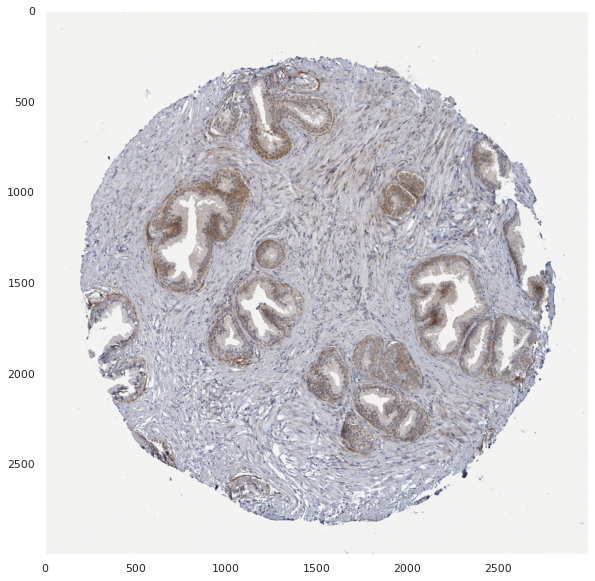

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(img)

## Train annotations

In [7]:
# https://www.kaggle.com/paulorzp/rle-functions-run-length-encode-decode
def mask2rle(img): # encoder
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels= img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)
 
def rle2mask(mask_rle, shape=(1600,256)): # decoder
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

In [8]:
mask = rle2mask(data[data["id"]==id_]["rle"].values[0], (img.shape[1], img.shape[0]))
mask.shape

(3000, 3000)

### Plot mask

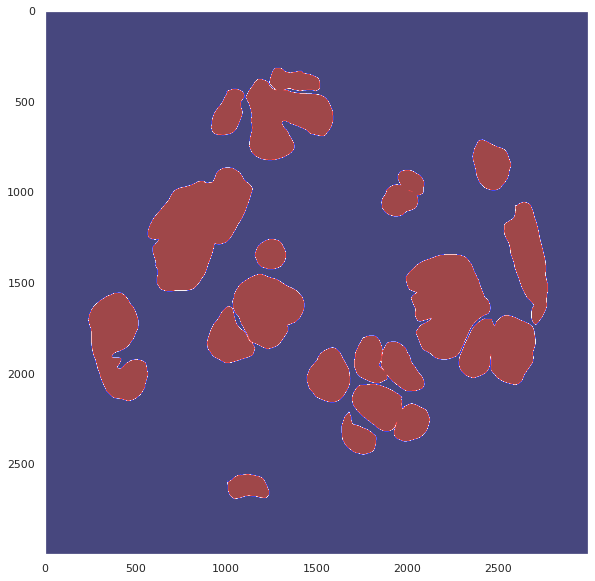

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(mask, cmap='seismic', alpha=0.7)

<a id="img_viz"></a>

<h2 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #CCCCFF; color: black;" id="img_viz"><center><br>2. IMAGE + MASK VISUALIZATION <a href="#toc">&#10514;</center> </h2>

# Overlay image and mask

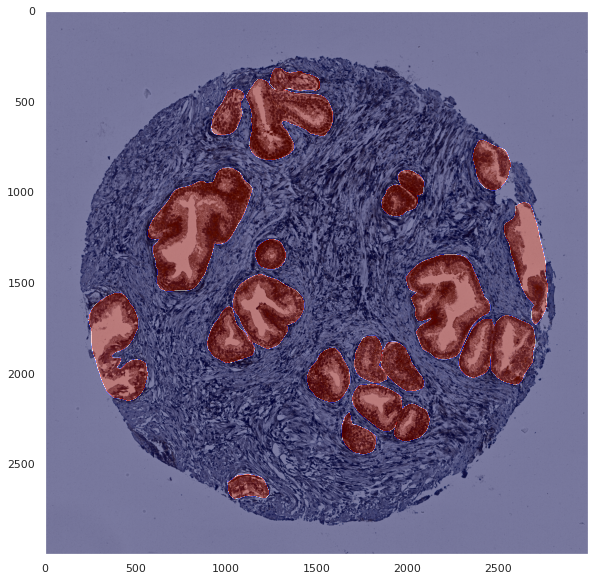

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(enhanced_img)
plt.imshow(mask, cmap='seismic', alpha=0.5)

In [11]:
# plot mask on enhanced image
def plot_mask(image, mask, image_id):
    plt.figure(figsize=(10, 10))
    
    lab= cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l_channel, a, b = cv2.split(lab)
    # Applying CLAHE to L-channel
    # feel free to try different values for the limit and grid size:
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(12,12))
    cl = clahe.apply(l_channel)

    # merge the CLAHE enhanced L-channel with the a and b channel
    limg = cv2.merge((cl,a,b))

    # Converting image from LAB Color model to BGR color space
    enhanced_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    
    
    # subplot(nrows, ncols, index)
    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.title(f"Image {image_id}", fontsize=14)

    plt.subplot(2, 2, 2)
    plt.imshow(enhanced_img)
    plt.title(f"Enhanced Image {image_id}", fontsize=14)
    
    plt.subplot(2, 2, 3)
    plt.imshow(mask, cmap="seismic", alpha =0.8)
    plt.title(f"Mask", fontsize=14)    
    
    plt.subplot(2, 2, 4)
    plt.imshow(enhanced_img)
    plt.imshow(mask, cmap="seismic", alpha=0.5)
    plt.title(f"Enhanced Image {image_id} + mask", fontsize=14)    
    
    
    plt.show()

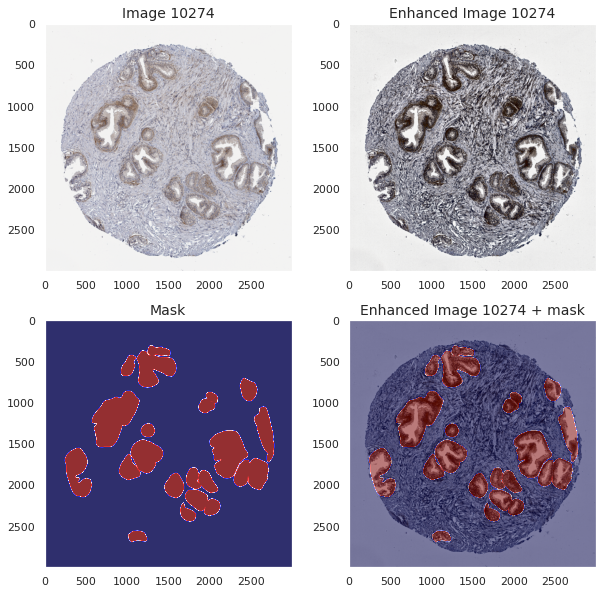

In [12]:
plot_mask(img, mask, id_)

# Batches of images + masks grouped by organs

* Prostate
* Spleen
* Lung
* Kidney
* Large Intestine

## Helper functions

In [13]:
def read_image_mask(df, img_id):
    image = tiff.imread(str(config.TRAIN_IMAGES_PATH/ f"{img_id}.tiff"))
    
    mask = rle2mask(
        df[df["id"] == img_id]["rle"].values[0], 
        (image.shape[1], image.shape[0])
    )
    return image, mask

In [14]:
def image_info(df, img_id):
    organ = df[df['id'] == img_id]['organ'].values[0]
    pixel_size = df.loc[df['id'] == img_id]['pixel_size'].values[0]
    tissue_thickness = df.loc[df['id'] == img_id]['tissue_thickness'].values[0]
    age = df.loc[df['id'] == img_id]['age'].values[0]
    sex = df.loc[df['id'] == img_id]['sex'].values[0]
    image, mask_ = read_image_mask(df, img_id)
    print('\033[1m' + 'Case study : {}'.format(img_id) + '\033[0m')
    print('\n------------------------------\n')
    print('\033[1m' + 'General info: \n' + '\033[0m')
    print('\033[1m' + 'Organ: ' '\033[0m' + f'{organ}')   
    print('\033[1m' + 'Age: ' '\033[0m' + f'{age}')
    print('\033[1m' + 'Sex: ' '\033[0m' + f'{sex}')
    print('\n------------------------------\n')
    print('\033[1m' + 'Image + Mask info: \n' + '\033[0m')
    print('\033[1m' + 'Pixel size: ' '\033[0m' + f'{pixel_size}')
    print('\033[1m' + 'Tissue thickness: ' '\033[0m' + f'{tissue_thickness}')
    print('\033[1m' + 'Image shape: ' '\033[0m' + f'{image.shape}')
    print('\033[1m' + 'Mask shape: ' '\033[0m' + f'{mask_.shape}')
    plot_mask(image, mask_, img_id)

## Prostate (Only male)

In [15]:
df_prostate = data.loc[data['organ']=='prostate']
df_prostate.head()

id     organ data_source  img_height  img_width  pixel_size  \
0   10044  prostate         HPA        3000       3000         0.4   
1   10274  prostate         HPA        3000       3000         0.4   
7   10666  prostate         HPA        3000       3000         0.4   
10  10912  prostate         HPA        3000       3000         0.4   
11  10971  prostate         HPA        3000       3000         0.4   

    tissue_thickness                                                rle   age  \
0                  4  1459676 77 1462675 82 1465674 87 1468673 92 14...  37.0   
1                  4  715707 2 718705 8 721703 11 724701 18 727692 3...  76.0   
7                  4  2698231 7 2701231 7 2704226 16 2707221 25 2710...  57.0   
10                 4  1147323 50 1150316 59 1153309 68 1156303 76 11...  60.0   
11                 4  1507862 60 1510857 69 1513853 77 1516848 86 15...  60.0   

     sex  
0   Male  
1   Male  
7   Male  
10  Male  
11  Male

Case study : 10044

------------------------------

General info: 

Organ: prostate
Age: 37.0
Sex: Male

------------------------------

Image + Mask info: 

Pixel size: 0.4
Tissue thickness: 4
Image shape: (3000, 3000, 3)
Mask shape: (3000, 3000)


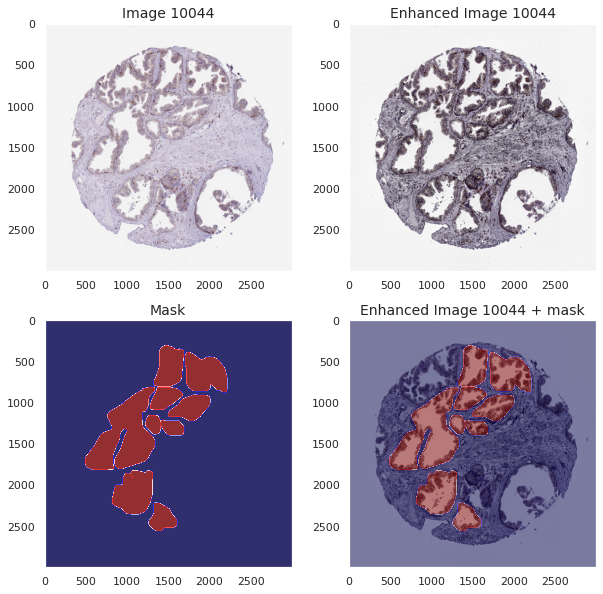

Case study : 10274

------------------------------

General info: 

Organ: prostate
Age: 76.0
Sex: Male

------------------------------

Image + Mask info: 

Pixel size: 0.4
Tissue thickness: 4
Image shape: (3000, 3000, 3)
Mask shape: (3000, 3000)


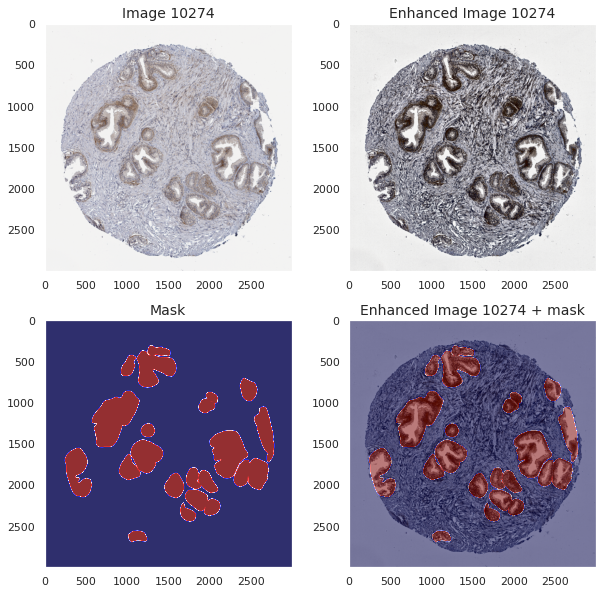

In [16]:
image_info(df_prostate, 10044)
image_info(df_prostate, 10274)

### Spleen

In [17]:
df_spleen = data.loc[data['organ']=='spleen']
df_spleen.head()

id   organ data_source  img_height  img_width  pixel_size  \
2   10392  spleen         HPA        3000       3000         0.4   
4   10610  spleen         HPA        3000       3000         0.4   
8   10703  spleen         HPA        3000       3000         0.4   
12  10992  spleen         HPA        3000       3000         0.4   
14   1123  spleen         HPA        3000       3000         0.4   

    tissue_thickness                                                rle   age  \
2                  4  1228631 20 1231629 24 1234624 40 1237623 47 12...  82.0   
4                  4  478925 68 481909 87 484893 105 487863 154 4908...  21.0   
8                  4  811259 262 814258 264 817257 266 820256 267 82...  50.0   
12                 4  2245542 37 2248540 41 2251534 53 2254533 55 22...  74.0   
14                 4  2852439 100 2855436 106 2858434 110 2861421 13...  21.0   

       sex  
2     Male  
4   Female  
8   Female  
12  Female  
14  Female

Case study : 2279

------------------------------

General info: 

Organ: spleen
Age: 82.0
Sex: Male

------------------------------

Image + Mask info: 

Pixel size: 0.4
Tissue thickness: 4
Image shape: (3000, 3000, 3)
Mask shape: (3000, 3000)


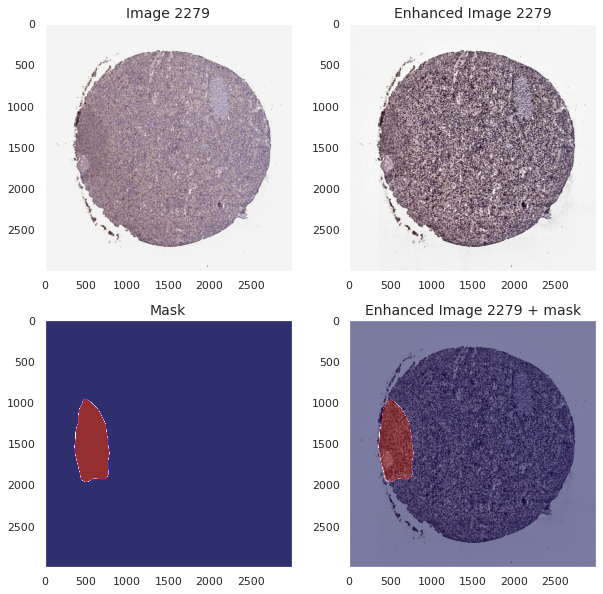

Case study : 10610

------------------------------

General info: 

Organ: spleen
Age: 21.0
Sex: Female

------------------------------

Image + Mask info: 

Pixel size: 0.4
Tissue thickness: 4
Image shape: (3000, 3000, 3)
Mask shape: (3000, 3000)


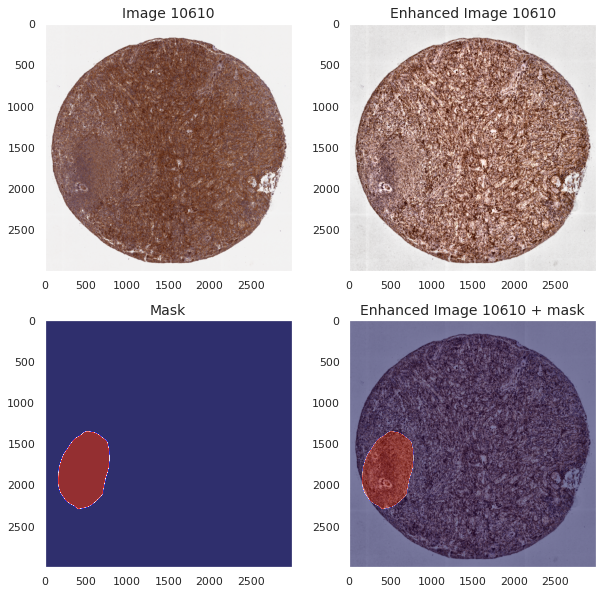

In [18]:
image_info(df_spleen, 2279)
image_info(df_spleen, 10610)

### Lung

In [19]:
df_lung = data.loc[data['organ']=='lung']
df_lung.head()

id organ data_source  img_height  img_width  pixel_size  \
3   10488  lung         HPA        3000       3000         0.4   
13  11064  lung         HPA        3000       3000         0.4   
18  11629  lung         HPA        3000       3000         0.4   
26   1220  lung         HPA        3000       3000         0.4   
30  12452  lung         HPA        3000       3000         0.4   

    tissue_thickness                                                rle   age  \
3                  4  3446519 15 3449517 17 3452514 20 3455510 24 34...  78.0   
13                 4  2210040 68 2213039 70 2216036 74 2219032 79 22...  65.0   
18                 4  4143554 1 4146554 2 4149554 3 4152555 3 415555...  43.0   
26                 4  1429797 16 1432793 21 1435791 23 1438789 27 14...  59.0   
30                 4  4648688 22 4651675 37 4654675 39 4657670 48 46...  78.0   

       sex  
3     Male  
13    Male  
18  Female  
26    Male  
30    Male

Case study : 10488

------------------------------

General info: 

Organ: lung
Age: 78.0
Sex: Male

------------------------------

Image + Mask info: 

Pixel size: 0.4
Tissue thickness: 4
Image shape: (3000, 3000, 3)
Mask shape: (3000, 3000)


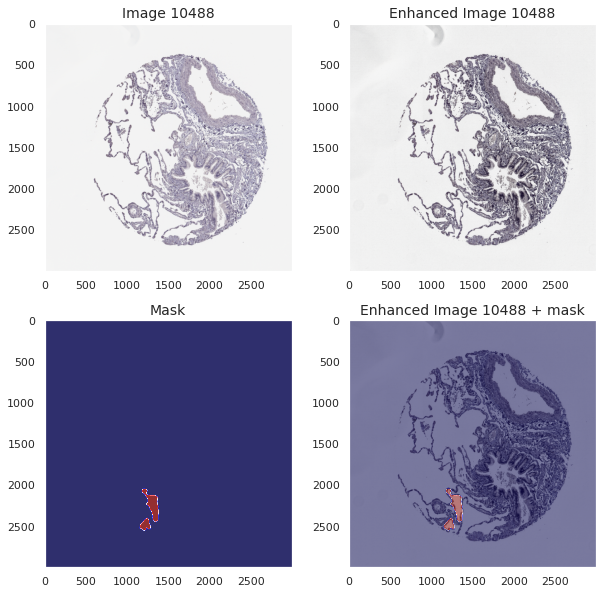

Case study : 11629

------------------------------

General info: 

Organ: lung
Age: 43.0
Sex: Female

------------------------------

Image + Mask info: 

Pixel size: 0.4
Tissue thickness: 4
Image shape: (3000, 3000, 3)
Mask shape: (3000, 3000)


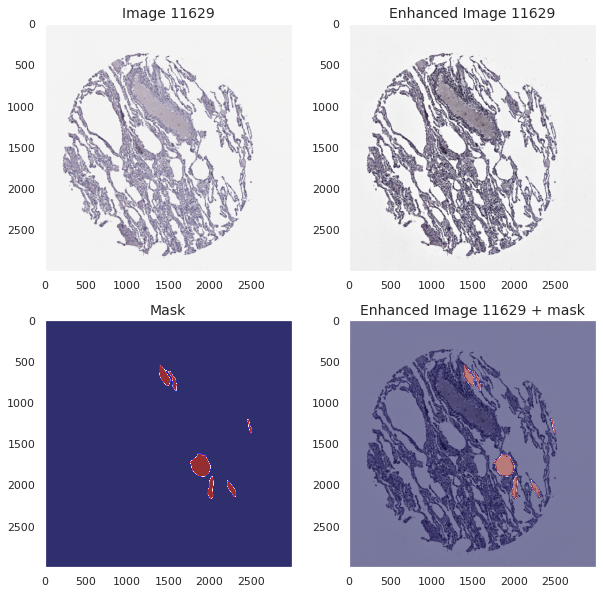

In [20]:
image_info(df_lung, 10488)
image_info(df_lung, 11629)

### Kidney

In [21]:
df_kidney = data.loc[data['organ']=='kidney']
df_kidney.head()

id   organ data_source  img_height  img_width  pixel_size  \
5   10611  kidney         HPA        3000       3000         0.4   
16  11497  kidney         HPA        3000       3000         0.4   
17   1157  kidney         HPA        3000       3000         0.4   
36  12784  kidney         HPA        2727       2727         0.4   
38  13034  kidney         HPA        3000       3000         0.4   

    tissue_thickness                                                rle   age  \
5                  4  730193 18 733191 25 736191 25 739152 65 742149...  68.0   
16                 4  940436 51 943430 65 946427 76 949423 89 952417...  41.0   
17                 4  4883571 15 4886565 32 4889561 41 4892559 49 48...  73.0   
36                 4  2286990 33 2289716 37 2292442 39 2295167 41 22...  61.0   
38                 4  850253 18 853250 24 856245 32 859237 46 862233...  73.0   

       sex  
5   Female  
16  Female  
17    Male  
36    Male  
38    Male

Case study : 1157

------------------------------

General info: 

Organ: kidney
Age: 73.0
Sex: Male

------------------------------

Image + Mask info: 

Pixel size: 0.4
Tissue thickness: 4
Image shape: (3000, 3000, 3)
Mask shape: (3000, 3000)


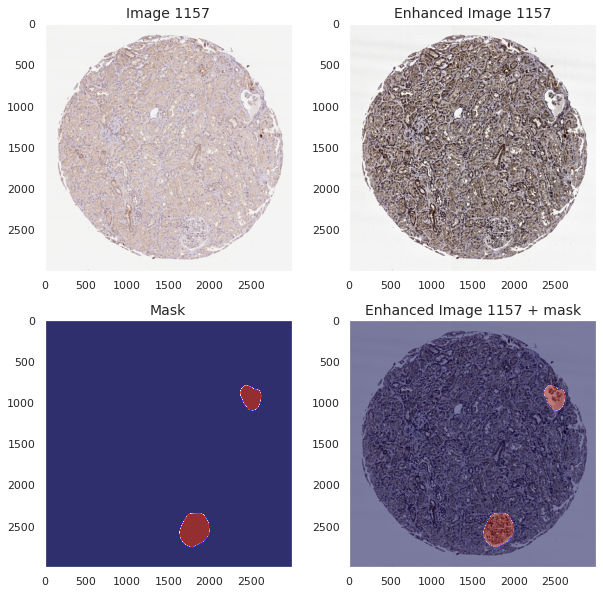

Case study : 11497

------------------------------

General info: 

Organ: kidney
Age: 41.0
Sex: Female

------------------------------

Image + Mask info: 

Pixel size: 0.4
Tissue thickness: 4
Image shape: (3000, 3000, 3)
Mask shape: (3000, 3000)


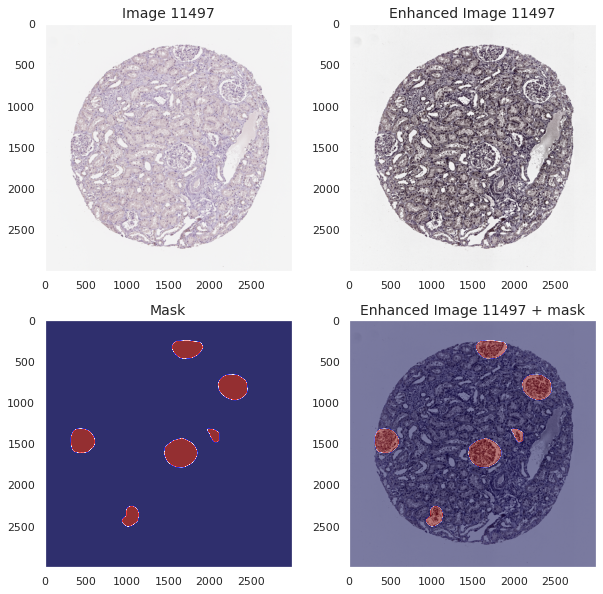

In [22]:
image_info(df_kidney, 1157)
image_info(df_kidney, 11497)

### Large intestine

In [23]:
df_LI = data.loc[data['organ']=='largeintestine']
df_LI.head()

id           organ data_source  img_height  img_width  pixel_size  \
6   10651  largeintestine         HPA        3000       3000         0.4   
9   10892  largeintestine         HPA        3000       3000         0.4   
20  11662  largeintestine         HPA        3000       3000         0.4   
21   1168  largeintestine         HPA        3000       3000         0.4   
23  11890  largeintestine         HPA        3000       3000         0.4   

    tissue_thickness                                                rle   age  \
6                  4  1240229 12 1243227 15 1246223 26 1249221 29 12...  83.0   
9                  4  523786 3 526784 8 529782 8 532778 9 535642 25 ...  79.0   
20                 4  673655 29 676649 41 679645 47 682638 59 685636...  84.0   
21                 4  652348 27 655344 35 658310 79 661305 93 664303...  84.0   
23                 4  1297230 32 1300222 46 1303215 60 1306213 63 13...  79.0   

       sex  
6     Male  
9   Female  
20  Female  
21    Male  
23  Female

Case study : 1168

------------------------------

General info: 

Organ: largeintestine
Age: 84.0
Sex: Male

------------------------------

Image + Mask info: 

Pixel size: 0.4
Tissue thickness: 4
Image shape: (3000, 3000, 3)
Mask shape: (3000, 3000)


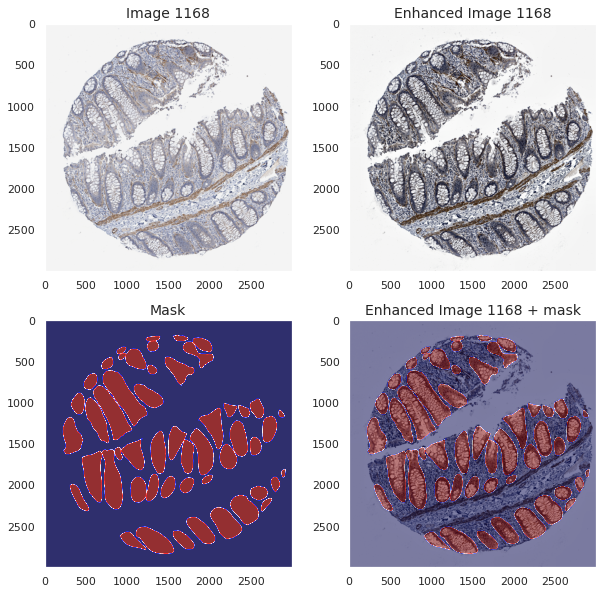

Case study : 11662

------------------------------

General info: 

Organ: largeintestine
Age: 84.0
Sex: Female

------------------------------

Image + Mask info: 

Pixel size: 0.4
Tissue thickness: 4
Image shape: (3000, 3000, 3)
Mask shape: (3000, 3000)


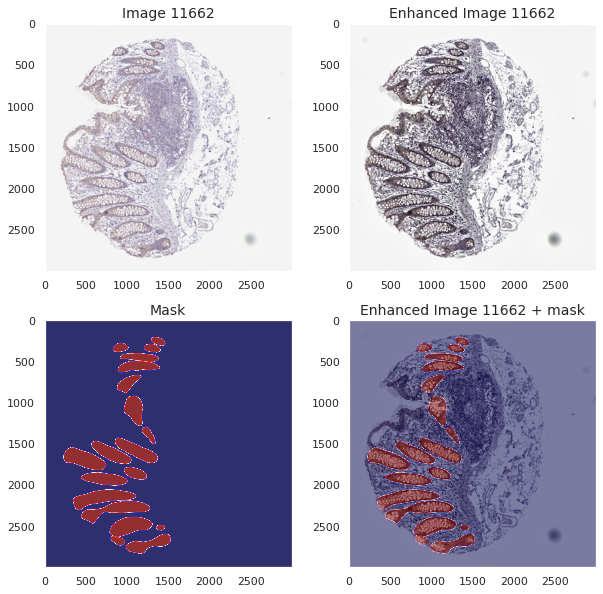

In [24]:
image_info(df_LI, 1168)
image_info(df_LI, 11662)

<a id="metadata"></a>

<h2 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #CCCCFF; color: black;" id="metadata"><center><br>3. METADATA ANALYSIS <a href="#toc">&#10514;</center> </h2>

# Statistical Description

In [25]:
def EDA(df):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape of the data (rows, columns):' + '\033[0m')
    print(df.shape, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'All columns from the dataframe :' + '\033[0m')
    print(df.columns, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatypes and Missing values:' + '\033[0m')
    print(df.info(), 
          '\n------------------------------------------------------------------------------------\n')
    
    for col in df.columns:
        print('\033[1m' + 'Unique values in {} :'.format(col) + '\033[0m',len(data[col].unique()))
    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summary statistics for the data :' + '\033[0m')
    print(df.describe(include='all'), 
          '\n------------------------------------------------------------------------------------\n')
    
        
    print('\033[1m' + 'Memory used by the data :' + '\033[0m')
    print(df.memory_usage(), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(df.duplicated().sum())
          
EDA(data)

EXPLORATORY DATA ANALYSIS :

Shape of the data (rows, columns):
(351, 10) 
------------------------------------------------------------------------------------

All columns from the dataframe :
Index(['id', 'organ', 'data_source', 'img_height', 'img_width', 'pixel_size',
       'tissue_thickness', 'rle', 'age', 'sex'],
      dtype='object') 
------------------------------------------------------------------------------------

Datatypes and Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                351 non-null    int64  
 1   organ             351 non-null    object 
 2   data_source       351 non-null    object 
 3   img_height        351 non-null    int64  
 4   img_width         351 non-null    int64  
 5   pixel_size        351 non-null    float64
 6   tissue_thickness  351 non-null    int64  
 7   rle    

# Data visualization

## Univariate visualization of categorical variables (sex, organ)


In [26]:
# https://www.kaggle.com/code/toomuchsauce/mental-health-plotly-interactive-viz
columns = ['organ','sex']
df = data[columns]

buttons = []
i = 0
vis = [False] * 4

for col in df.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 4

fig = go.Figure()

for col in df.columns:
    fig.add_trace(go.Pie(
             values = df[col].value_counts(),
             labels = df[col].value_counts().index,
             title = dict(text = 'Distribution of {}'.format(col),
                          font = dict(size=18, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',))

fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('Pastel1').as_hex(),
                              line=dict(color='#000000', width=1)))
              

fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 1.15,
                        y = 0.85,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                             showarrow=False,
                             x = 1.06, y = 0.92, yref = "paper", align = "left")])

for i in range(1,2):
    fig.data[i].visible = False

fig.show()

## Density chart with Age and Sex

Text(0.5, 1.05, 'Density between Age and Sex')

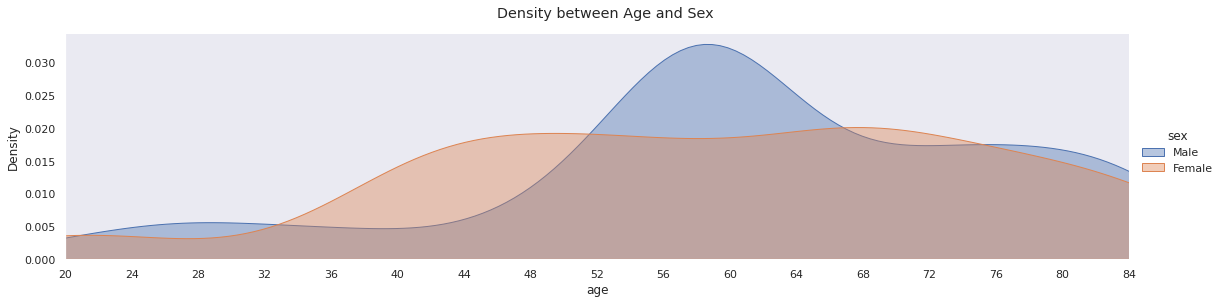

In [27]:
g = sns.FacetGrid(data,hue='sex', height=4, aspect=4)
g = g.map(sns.kdeplot,'age',shade=True,alpha=0.4)                      
g.add_legend()
g.set(xlim=(20, 84), xticks=np.arange(20,88,4))
g.fig.suptitle('Density between Age and Sex', y=1.05)

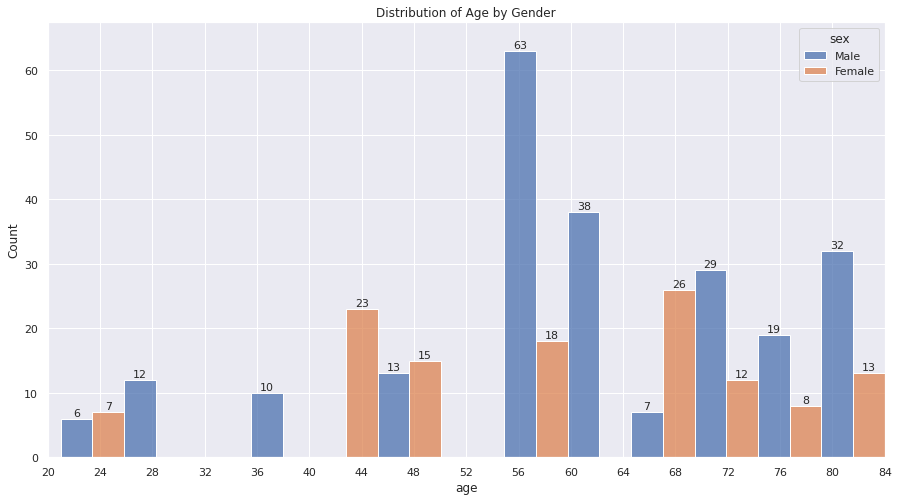

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
g = sns.histplot(data=data, x="age", hue="sex", multiple="dodge", color='sex', bins='fd')
g.set(title='Distribution of Age by Gender')
g.set(xlim=(20, 84), xticks=np.arange(20,88,4))
for p in g.patches:
    x, w, h = p.get_x(), p.get_width(), p.get_height()
    if h > 0:
        g.text(x + w / 2, h, f'{h}\n', ha='center', va='center', size=11)
g.margins(y=0.07)

## Distribution of organ type by gender

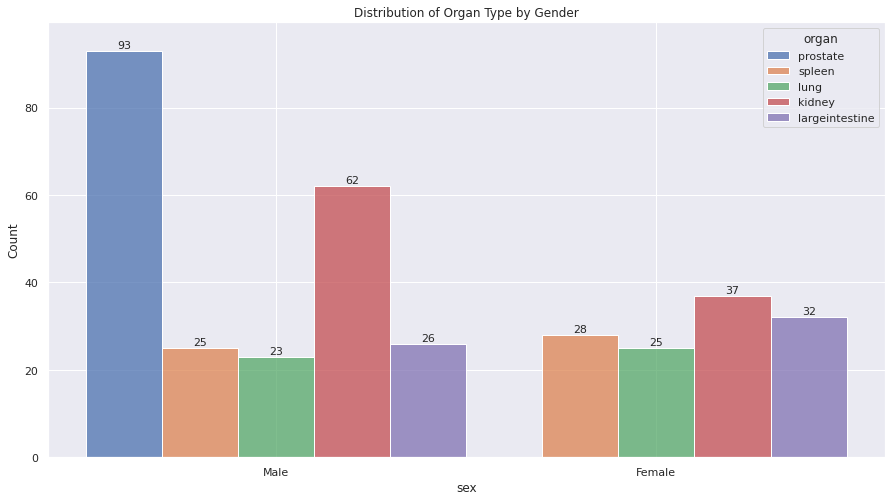

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
g = sns.histplot(data=data, x="sex", hue="organ", multiple="dodge", color='organ', bins='fd')
g.set(title='Distribution of Organ Type by Gender')
for p in g.patches:
    x, w, h = p.get_x(), p.get_width(), p.get_height()
    if h > 0:
        g.text(x + w / 2, h, f'{h}\n', ha='center', va='center', size=11)
g.margins(y=0.07)

## Distribution of age by organ type

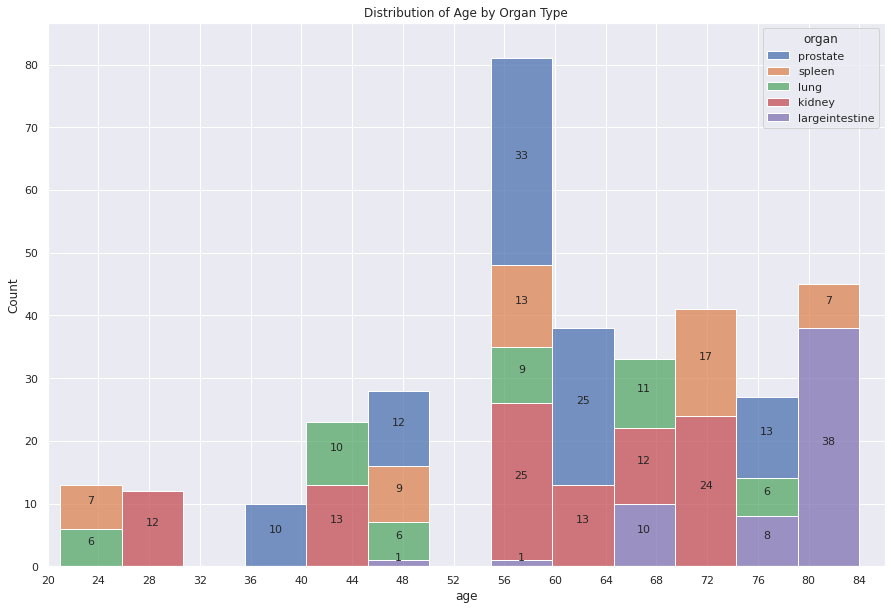

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,10))
g = sns.histplot(data=data, x="age", hue="organ", multiple="stack", color='organ', bins='fd')
g.set(xlim=(20, 86), xticks=np.arange(20,88,4))
g.set(title='Distribution of Age by Organ Type')
for p in g.patches:
    x, y, w, h = p.get_x(), p.get_y(), p.get_width(), p.get_height()
    if h > 0:
        g.text(x + w / 2, y + h / 2, f'{h:.0f}\n', ha='center', va='center', size=11)
g.margins(y=0.07)